In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Taxi Fare Guru: Total Amount Prediction Callenge

# Importing Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

# Loading the datasets

In [76]:
tr_df=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
sample = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv")
test_df=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")


# **EDA**

In [77]:
tr_df.shape

(175000, 17)

In [78]:
test_df.shape

(50000, 16)

In [79]:
sample

,ID,total_amount
0,1,24.456348
1,2,24.374058
2,3,19.878154
3,4,25.015569
4,5,22.252489
...,...,...
995,996,24.438531
996,997,26.773706
997,998,22.192718
998,999,142.698686


In [80]:
#Let's analyze the data
tr_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.00
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.00
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.00
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.00
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00


In [81]:
test_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.00
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.00
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.00
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.00
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,2023-06-29 17:41:59,2023-06-29 18:30:36,1.0,0.61,1.0,N,48,72,Credit Card,2.5,4.043482,0.0,1.0,2.5,0.00
49996,1,2023-06-30 01:25:25,2023-06-30 01:10:40,1.0,5.02,1.0,N,57,103,Cash,1.0,2.895882,0.0,1.0,0.0,1.75
49997,1,2023-06-30 22:28:44,2023-06-30 21:49:37,1.0,1.92,1.0,N,150,78,Credit Card,1.0,5.636590,0.0,1.0,2.5,0.00
49998,0,2023-06-30 02:37:18,2023-06-30 02:10:33,1.0,5.40,1.0,N,4,154,Credit Card,3.5,7.293144,0.0,1.0,2.5,0.00


In [82]:
print(tr_df.info())                     #It shows data has 4 categorical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [83]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  int64  
 1   tpep_pickup_datetime   50000 non-null  object 
 2   tpep_dropoff_datetime  50000 non-null  object 
 3   passenger_count        48221 non-null  float64
 4   trip_distance          50000 non-null  float64
 5   RatecodeID             48221 non-null  float64
 6   store_and_fwd_flag     48221 non-null  object 
 7   PULocationID           50000 non-null  int64  
 8   DOLocationID           50000 non-null  int64  
 9   payment_type           50000 non-null  object 
 10  extra                  50000 non-null  float64
 11  tip_amount             50000 non-null  float64
 12  tolls_amount           50000 non-null  float64
 13  improvement_surcharge  50000 non-null  float64
 14  congestion_surcharge   48221 non-null  float64
 15  Ai

In [84]:
tr_df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


In [85]:
tr_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')

# #Feature Engineering

In [86]:
tr_df['tpep_pickup_datetime']=pd.to_datetime(tr_df['tpep_pickup_datetime'])
tr_df['tpep_dropoff_datetime']=pd.to_datetime(tr_df['tpep_dropoff_datetime'])
tr_df['TripDuration']=abs(tr_df['tpep_dropoff_datetime'] - tr_df['tpep_pickup_datetime']).dt.total_seconds()
tr_df['date']=tr_df['tpep_pickup_datetime'].dt.date.map(datetime.datetime.toordinal)
tr_df['hour_of_day']=tr_df['tpep_pickup_datetime'].dt.hour
tr_df['day_of_week']=tr_df['tpep_pickup_datetime'].dt.dayofweek

In [87]:
X=tr_df.drop(['total_amount'], axis=1)
y=tr_df['total_amount']                                 #Total Amount column is the target variable

# Detecting Null values and counting them

In [88]:
X

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,TripDuration,date,hour_of_day,day_of_week
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,2.5,0.00,2736.0,738699,17,2
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,2.5,0.00,3806.0,738700,23,3
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,2.5,0.00,3219.0,738701,10,4
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,2.5,0.00,3412.0,738700,13,3
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,2.5,0.00,1130.0,738700,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,2.5,0.00,1715.0,738701,22,4
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,2.5,1.75,3684.0,738701,13,4
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,2.5,0.00,4202.0,738700,11,3
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,2.5,0.00,2302.0,738700,19,3


In [89]:
y

0         20.64
1         25.55
2         17.64
3         12.80
4         18.00
          ...  
174995    28.08
174996    59.95
174997    33.50
174998    40.80
174999    16.32
Name: total_amount, Length: 175000, dtype: float64

In [90]:
X.isna().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     6077
Airport_fee              6077
TripDuration                0
date                        0
hour_of_day                 0
day_of_week                 0
dtype: int64

In [91]:
X.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,TripDuration,date,hour_of_day,day_of_week
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,2.5,0.0,2736.0,738699,17,2
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,2.5,0.0,3806.0,738700,23,3
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,2.5,0.0,3219.0,738701,10,4
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,2.5,0.0,3412.0,738700,13,3
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,2.5,0.0,1130.0,738700,22,3


# Find outliers

<Axes: xlabel='trip_distance'>

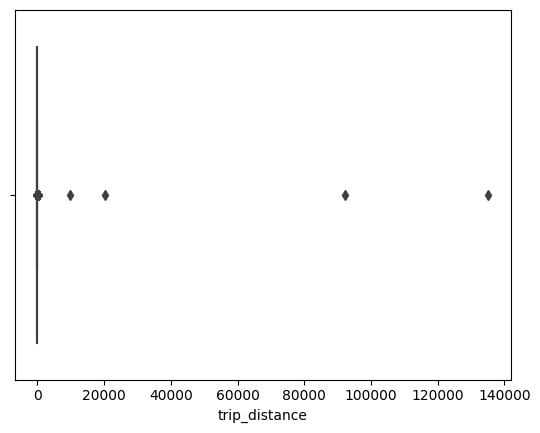

In [92]:
sns.boxplot(x=tr_df['trip_distance'])

In [93]:
max(tr_df['trip_distance']), min(tr_df['trip_distance'])


(135182.06, 0.0)

<Axes: xlabel='tip_amount'>

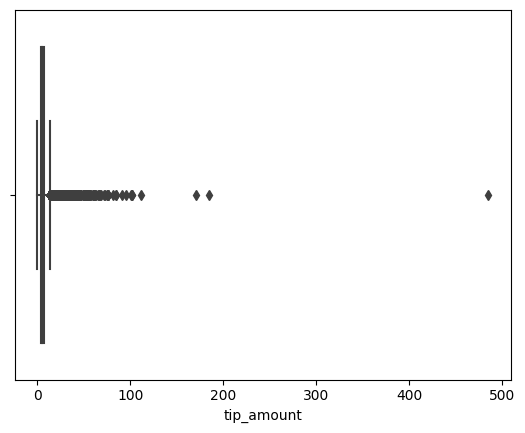

In [94]:
sns.boxplot(x=tr_df['tip_amount'])

<Axes: xlabel='extra'>

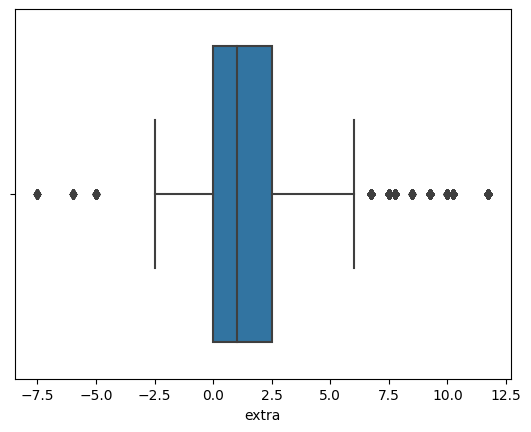

In [95]:
sns.boxplot(x=tr_df['extra'])

<Axes: xlabel='passenger_count', ylabel='Count'>

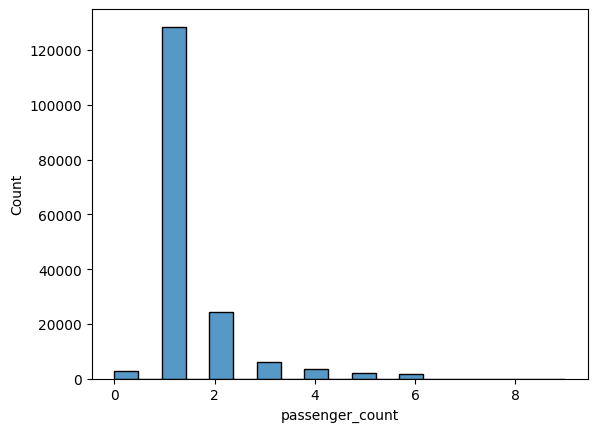

In [96]:
sns.histplot(x=tr_df['passenger_count'])

<Axes: xlabel='payment_type', ylabel='Count'>

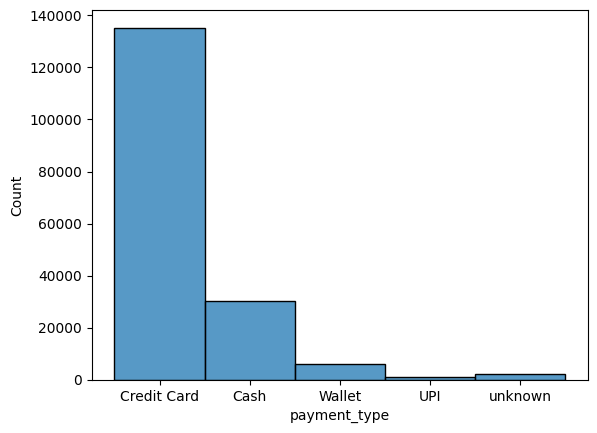

In [97]:
sns.histplot(x=tr_df['payment_type'])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


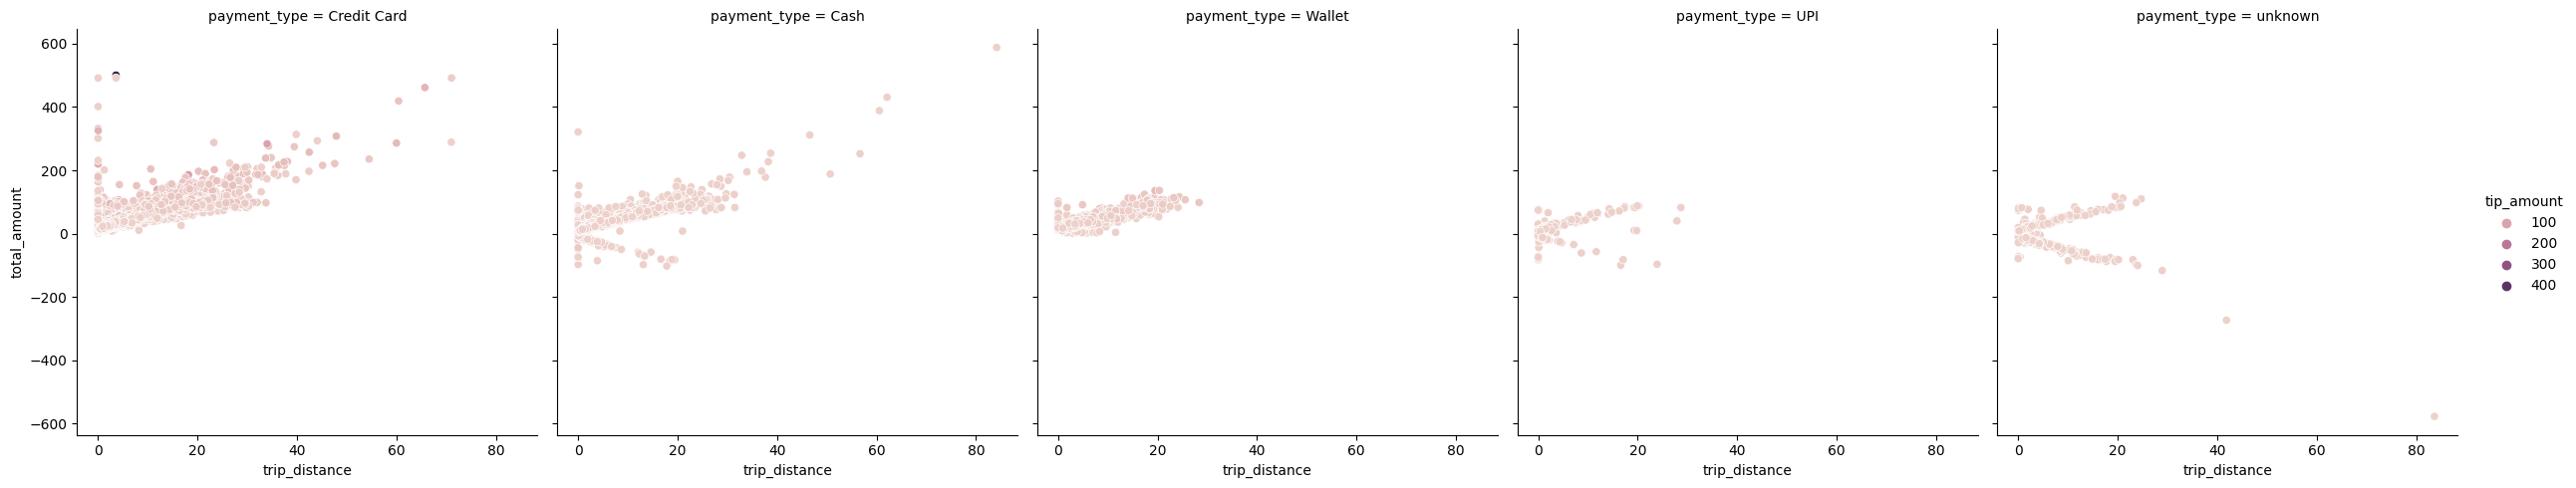

In [98]:
sns.relplot(
    data=tr_df[0:50000], x="trip_distance", y="total_amount",
    col="payment_type", hue="tip_amount",
    kind="scatter"
)


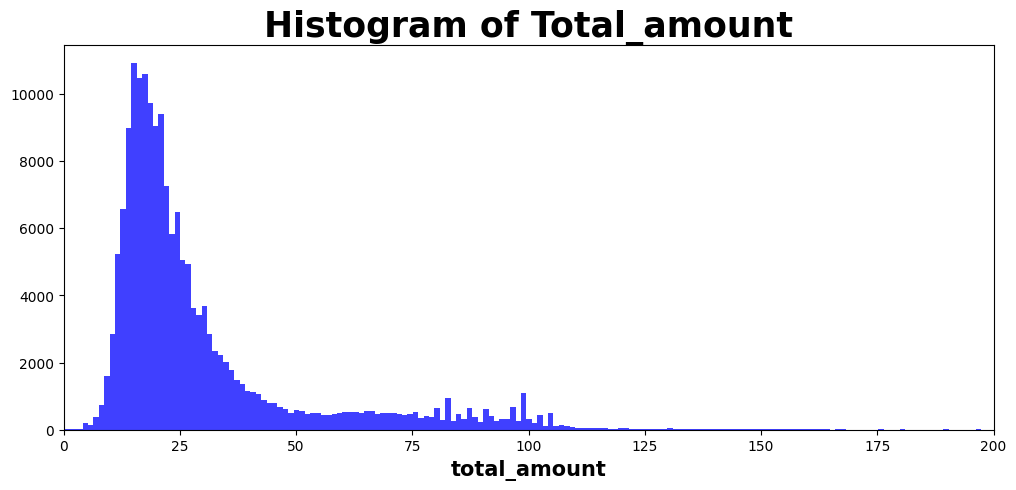

In [99]:
#Visualize the target variable
plt.figure(figsize=(12,5))
n,bins,patches=plt.hist(tr_df. total_amount, 1000, facecolor='blue', alpha=0.75)
plt.xlabel('total_amount', fontsize=15, fontweight='bold')
plt.title("Histogram of Total_amount", fontsize=25, fontweight='bold')
plt.xlim(0,200)
plt.show();

In [100]:
# Dropped Categorical variables
drop_columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag']              
X_train=X.drop(columns=drop_columns)

In [101]:
X_train.shape

(175000, 17)

In [102]:
y.shape

(175000,)

In [103]:
X_train.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,TripDuration,date,hour_of_day,day_of_week
0,1,1.0,2.14,1.0,120,9,Credit Card,2.5,7.165589,0.0,1.0,2.5,0.0,2736.0,738699,17,2
1,0,1.0,2.70,1.0,15,215,Credit Card,3.5,6.067401,0.0,1.0,2.5,0.0,3806.0,738700,23,3
2,1,1.0,1.15,1.0,167,223,Credit Card,0.0,4.111547,0.0,1.0,2.5,0.0,3219.0,738701,10,4
3,0,1.0,0.40,1.0,128,239,Credit Card,2.5,6.411079,0.0,1.0,2.5,0.0,3412.0,738700,13,3
4,1,3.0,1.10,1.0,203,52,Credit Card,1.0,4.769377,0.0,1.0,2.5,0.0,1130.0,738700,22,3


# Analysing attributes

In [104]:
tr_df['day_of_week'].value_counts()              #Monday coded as 0

day_of_week
3    73709
4    66037
2    34510
5      744
Name: count, dtype: int64

Text(0.5, 0, 'counts')

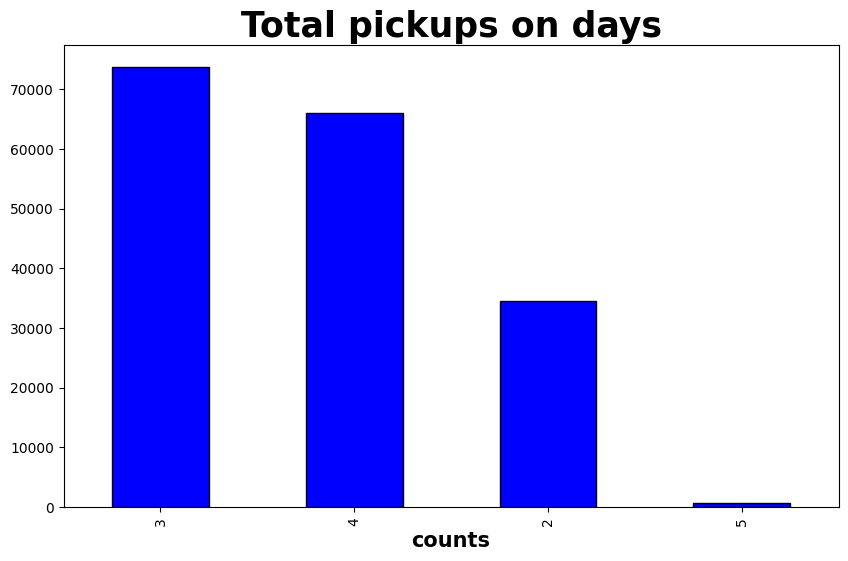

In [105]:
plt.figure(figsize=(10,6))
tr_df['day_of_week'].value_counts().plot.bar(color='b', edgecolor='k')
plt.xlabel('Passenger counts', fontsize=15, fontweight='bold')
plt.title("Total pickups on days", fontsize=25, fontweight='bold')
plt.xlabel('counts', fontsize=15, fontweight='bold')

In [106]:
tr_df['passenger_count'].value_counts()

passenger_count
1.0    128534
2.0     24316
3.0      6018
4.0      3668
0.0      2818
5.0      1970
6.0      1596
8.0         2
9.0         1
Name: count, dtype: int64

<Axes: xlabel='hour_of_day', ylabel='Count'>

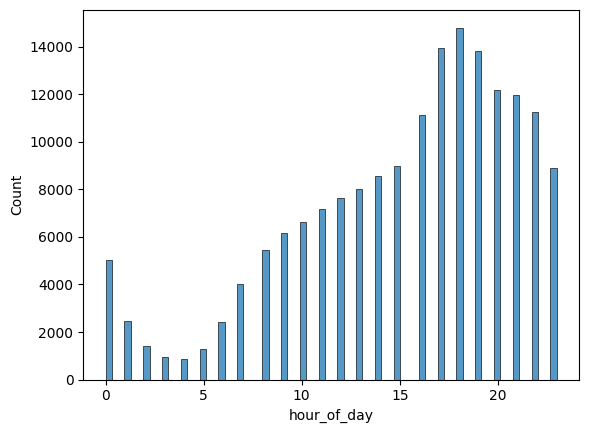

In [107]:
sns.histplot(tr_df['hour_of_day'])

<Axes: xlabel='hour_of_day', ylabel='total_amount'>

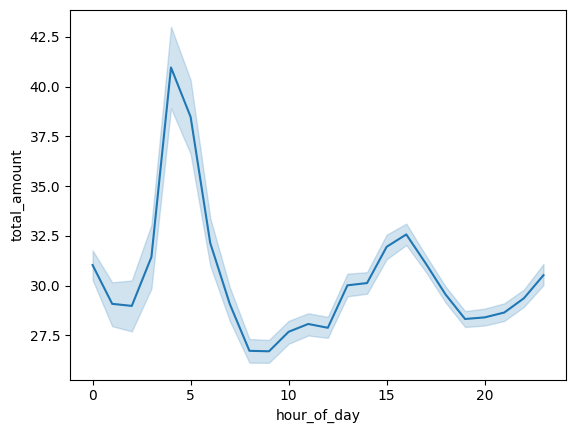

In [108]:
sns.lineplot(data=tr_df, x='hour_of_day', y='total_amount')

# Preprocessing

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.2, random_state=42)

In [110]:
X_train.shape

(140000, 17)

In [111]:
y_test.shape

(35000,)

# Encoding and Scaling Features

In [112]:
si = SimpleImputer(strategy="most_frequent")
ohe = OneHotEncoder(sparse_output=False)
le = LabelEncoder()
minmaxs = MinMaxScaler()

std = StandardScaler()
tran_list = [('impute', si, ['passenger_count']), ('cat_encoder', ohe, ['payment_type']), ('scaler', std, ['trip_distance', 'tip_amount', 'extra', 'TripDuration', 'date', 'hour_of_day', 'day_of_week'])]
col_tran = ColumnTransformer(transformers=tran_list, remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas")
tran_X_train = col_tran.fit_transform(X_train)
tran_X_test = col_tran.transform(X_test)
tran_X_train.head()   

,passenger_count,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown,trip_distance,tip_amount,extra,TripDuration,...,hour_of_day,day_of_week,VendorID,RatecodeID,PULocationID,DOLocationID,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
143961,1.0,0.0,1.0,0.0,0.0,0.0,0.005143,0.395557,-0.480023,-0.195177,...,1.365373,-0.250797,1,1.0,181,174,0.0,1.0,0.0,1.75
170292,1.0,0.0,1.0,0.0,0.0,0.0,-0.010709,-0.832124,0.288641,-0.612503,...,0.672830,-1.591391,1,1.0,250,226,0.0,1.0,2.5,0.00
161029,1.0,0.0,0.0,0.0,0.0,1.0,-0.011841,-1.094556,-0.992466,-0.835124,...,1.019102,1.089798,1,2.0,236,251,0.0,-1.0,-2.5,0.00
84006,1.0,0.0,1.0,0.0,0.0,0.0,-0.011139,-0.795933,0.801085,0.491767,...,0.845966,-0.250797,0,1.0,83,166,0.0,1.0,2.5,0.00
95628,1.0,0.0,1.0,0.0,0.0,0.0,-0.008195,-0.208052,1.569749,-0.433346,...,0.326559,-1.591391,0,1.0,70,35,0.0,1.0,2.5,0.00


In [113]:
tran_XNew = pd.DataFrame(tran_X_train)
tran_X_testNew = pd.DataFrame(tran_X_test)

# HeatMap for finding correlation

In [114]:
data=pd.concat((tran_XNew, pd.DataFrame(y)), axis=1)

<Axes: >

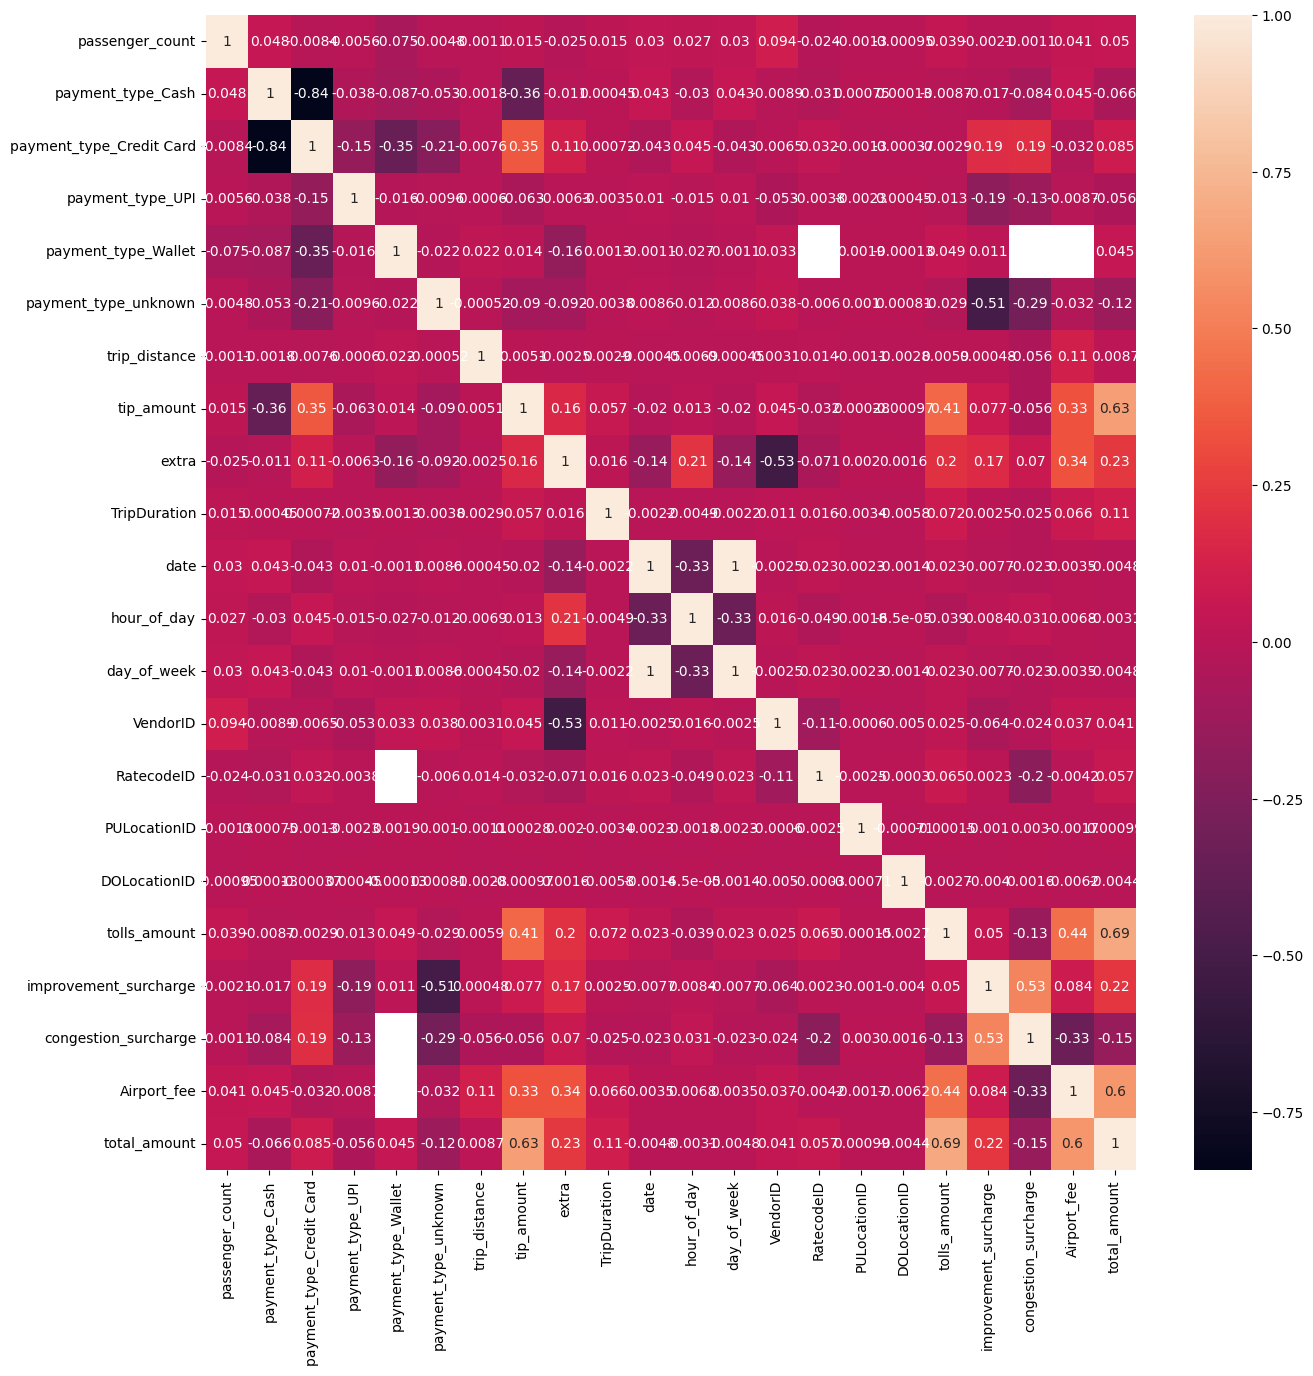

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True)

# Imputing

In [116]:
tran_XNew['RatecodeID'].fillna(tran_XNew['RatecodeID'].mean(), inplace=True)
tran_XNew['Airport_fee'].fillna(tran_XNew['Airport_fee'].mean(), inplace=True)
tran_XNew['congestion_surcharge'].fillna(tran_XNew['congestion_surcharge'].mean(), inplace=True)

tran_X_testNew['RatecodeID'].fillna(tran_XNew['RatecodeID'].mean(), inplace=True)
tran_X_testNew['Airport_fee'].fillna(tran_XNew['Airport_fee'].mean(), inplace=True)
tran_X_testNew['congestion_surcharge'].fillna(tran_XNew['congestion_surcharge'].mean(), inplace=True)

In [117]:
tran_XNew.isna().sum()

passenger_count             0
payment_type_Cash           0
payment_type_Credit Card    0
payment_type_UPI            0
payment_type_Wallet         0
payment_type_unknown        0
trip_distance               0
tip_amount                  0
extra                       0
TripDuration                0
date                        0
hour_of_day                 0
day_of_week                 0
VendorID                    0
RatecodeID                  0
PULocationID                0
DOLocationID                0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge        0
Airport_fee                 0
dtype: int64

In [118]:
tran_X_testNew.isna().sum()

passenger_count             0
payment_type_Cash           0
payment_type_Credit Card    0
payment_type_UPI            0
payment_type_Wallet         0
payment_type_unknown        0
trip_distance               0
tip_amount                  0
extra                       0
TripDuration                0
date                        0
hour_of_day                 0
day_of_week                 0
VendorID                    0
RatecodeID                  0
PULocationID                0
DOLocationID                0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge        0
Airport_fee                 0
dtype: int64

# Model Training
# RandomForestRegressor

In [119]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [120]:
model.fit(tran_XNew, y_train)
train_predictions = model.predict(tran_XNew)
test_predictions = model.predict(tran_X_testNew)

In [121]:
r2_score(y_train, train_predictions),r2_score(y_test, test_predictions)


(0.9874792572927006, 0.9601620538116661)

# GradientBoostingRegressor

In [122]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(learning_rate=0.2, n_estimators=200, random_state=42)

In [123]:
model.fit(tran_XNew, y_train)
train_predictions = model.predict(tran_XNew)
test_predictions = model.predict(tran_X_testNew)

In [124]:
r2_score(y_train, train_predictions),r2_score(y_test, test_predictions)

(0.9564786638295254, 0.951768171115332)

# KNeighborsRegressor

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [126]:
knn=KNeighborsRegressor()
param_grid={'n_neighbors':[3,5,7,9,11]}
grid_search=GridSearchCV(knn, param_grid,scoring=make_scorer(r2_score),cv=5)              #Hyperparameter tuning and CV
grid_search.fit(tran_XNew,y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'n_neighbors': 5}


In [127]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(tran_XNew, y_train)
train_predictions = model.predict(tran_XNew)
test_predictions = model.predict(tran_X_testNew)

In [128]:
r2_score(y_train, train_predictions),r2_score(y_test, test_predictions)

(0.7031306075006241, 0.5283712928607281)

# LinearRegression

In [129]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(tran_XNew, y_train)

LinearRegression()

In [130]:
train_predictions = model.predict(tran_XNew)
test_predictions = model.predict(tran_X_testNew)

r2_score(y_train, train_predictions),r2_score(y_test, test_predictions)

(0.726819454753459, 0.7234609291017072)

# XGBoostRegressor

In [131]:
from xgboost import XGBRegressor
xgboost_model=XGBRegressor(random_state=42)
xgboost_model.fit(tran_XNew,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [132]:
train_predictions = xgboost_model.predict(tran_XNew)
test_predictions = xgboost_model.predict(tran_X_testNew)

r2_score(y_train, train_predictions),r2_score(y_test, test_predictions)

(0.9784489714852093, 0.9606045449559556)

# Test Data

In [133]:
test_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.0
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.0
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.0


In [134]:
test_df['tpep_pickup_datetime']=pd.to_datetime(test_df['tpep_pickup_datetime'])
test_df['tpep_dropoff_datetime']=pd.to_datetime(test_df['tpep_dropoff_datetime'])
test_df['TripDuration']=abs(test_df['tpep_dropoff_datetime'] - test_df['tpep_pickup_datetime']).dt.total_seconds()
test_df['date']=test_df['tpep_pickup_datetime'].dt.date.map(datetime.datetime.toordinal)
test_df['hour_of_day']=test_df['tpep_pickup_datetime'].dt.hour
test_df['day_of_week']=test_df['tpep_pickup_datetime'].dt.dayofweek


test_df=test_df.drop(columns=drop_columns)

In [135]:
test_df = col_tran.transform(test_df)
test_df['RatecodeID'].fillna(tran_XNew['RatecodeID'].mean(), inplace=True)
test_df['Airport_fee'].fillna(tran_XNew['Airport_fee'].mean(), inplace=True)
test_df['congestion_surcharge'].fillna(tran_XNew['congestion_surcharge'].mean(), inplace=True)

In [136]:
predictions = model.predict(test_df)

submission = pd.DataFrame(columns = ['ID', 'total_amount'])
submission['ID'] = [i+1 for i in range(len(predictions))]
submission['total_amount'] = predictions
submission.to_csv('submission.csv', index = False)
submission.head()
submission.info

<bound method DataFrame.info of           ID  total_amount
0          1     22.324777
1          2     22.834898
2          3     24.230895
3          4     23.681127
4          5     24.514234
...      ...           ...
49995  49996     19.310154
49996  49997     48.040311
49997  49998     22.717504
49998  49999     24.167268
49999  50000     19.135025

[50000 rows x 2 columns]>